### Importing all required libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

### Read the sales data from excel

In [2]:
sales = pd.read_excel("SalesSalary.xlsx", index_col="Observation")
sales.head()

,Salary ($),Position,Experience
Observation,,,
1,53938,Inside,Medium
2,52694,Inside,Medium
3,70515,Outside,Low
4,52031,Inside,Medium
5,62283,Outside,Low


In [24]:
#missing values
print(sales.isnull().sum())
print('\n',sales.describe())

Salary ($)    0
Position      0
Experience    0
dtype: int64

          Salary ($)
count    120.000000
mean   64925.475000
std    10838.672975
min    48621.000000
25%    56274.250000
50%    61489.500000
75%    76092.250000
max    88730.000000


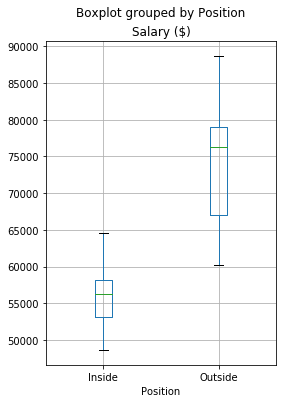

In [4]:
sales.boxplot("Salary ($)",
              by = "Position",
             figsize=(4,6));

###### From the above plot it is evident that for the sample provided salary for Outside Position is quite higher than the Inside ones

In [3]:
outside_sales = sales[sales["Position"] == "Outside"]
inside_sales = sales[sales["Position"] == "Inside"]

In [5]:
ttest_ind(outside_sales["Salary ($)"],
         inside_sales["Salary ($)"],
         equal_var=False)
##p-value is much less than 0.05; we can assume rejecting the hypothesis that H0 --> u1 = u2

Ttest_indResult(statistic=15.86002634068392, pvalue=9.675129625763386e-27)

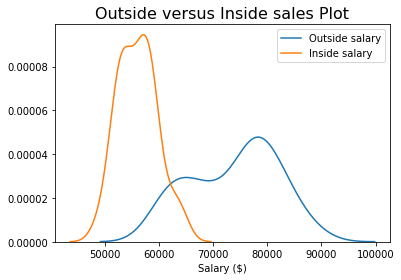

In [13]:
fig, ax = plt.subplots()
sns.distplot(outside_sales["Salary ($)"],bins=10, 
             hist=False,
             kde=True,
            label = "Outside salary")
sns.distplot(inside_sales["Salary ($)"],bins=10, 
             hist=False,
             kde=True,
            label = "Inside salary")
plt.title("Outside versus Inside sales Plot",
          fontdict={'fontsize': 16,
                    'fontweight' : 28} )
plt.legend();

#from the above plot it seems that 
    * inside sales - Around 50k to 60k
    * outside sales - Around 65k to 80k
The inside sales plot is much thinner (t score to be considered for this) than the outside sales plot (z score for this)

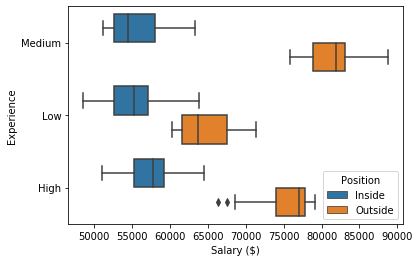

In [22]:
sns.boxplot(x=sales["Salary ($)"],
            y=sales["Experience"],
           hue=sales["Position"]);

In [19]:
#get 5 point summary
print(outside_sales.describe(),'\n\n\n\n',inside_sales.describe())

         Salary ($)
count     60.000000
mean   73830.433333
std     7922.960411
min    60259.000000
25%    67007.750000
50%    76315.500000
75%    78972.250000
max    88730.000000 



          Salary ($)
count     60.000000
mean   56020.516667
std     3589.826121
min    48621.000000
25%    53190.750000
50%    56209.500000
75%    58202.000000
max    64562.000000


In [30]:
from statsmodels.stats import weightstats as stests
ztest , pval1 = stests.ztest(outside_sales["Salary ($)"], x2=inside_sales["Salary ($)"], value=0, alternative='two-sided')

print(float(pval1))

1.1984361138174986e-56


### Anova Testing

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(sales["Salary ($)"],sales["Experience"])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj     lower      upper    reject
-----------------------------------------------------------
  High    Low -6519.05 0.0145 -11964.6629 -1073.4371   True
  High Medium  2279.45 0.5767  -3166.1629  7725.0629  False
   Low Medium   8798.5  0.001   3352.8871 14244.1129   True
-----------------------------------------------------------
['High' 'Low' 'Medium']


In [43]:
#z score and t score
from scipy import stats
print("Z score for outside sales  : ",stats.zscore(outside_sales["Salary ($)"]))
      
print("Z score for inside sales  : ",stats.zscore(inside_sales["Salary ($)"]))

Z score for outside sales  :  [-0.42199027 -1.46976397  0.66829515 -0.12669933 -1.26955162 -0.63289418
 -1.31766368  1.2747871   1.18950911 -0.11664416  1.17219895 -1.21456642
  1.89642543  0.49035691 -0.31634739  0.54012361 -1.05444745 -0.99360733
  0.70673389 -1.61677304  0.62107406  0.25946994  0.3731315  -1.63395591
 -1.59500806  1.14088793  0.45471834  0.64983947  0.63889334  0.07109469
  1.63702762  0.44873616  0.50779435  0.50537601  0.55221527 -0.67082379
 -0.95593228 -0.839216   -1.47714624  0.44300853  0.38598683  1.00800701
 -1.39365019  0.24954206 -1.54651416  1.11899567  0.19035659 -0.66967827
  0.97949616  1.04733671  0.06918548  0.87385328  0.48259279 -0.5967465
 -0.7926313  -1.68894112  1.68768529  0.62005581  1.18378149 -1.72737986]
T score for inside sales  :  [-0.58501189 -0.93447118 -1.12071837  0.47684993 -2.07864133 -0.35185175
 -1.0502085  -0.10914048 -1.1780252  -1.14403438  0.15941505  0.90805572
 -0.71816599  1.38448896 -0.89542388  2.39943784 -0.94851697 -0.0

In [4]:
inside_sales["Salary ($)"]

Observation
1      53938
2      52694
4      52031
6      57718
8      48621
10     54768
11     52282
12     55632
14     51827
15     51948
16     56588
20     59253
21     53464
23     60949
24     52833
28     64562
29     52644
30     55959
33     56339
35     63799
38     59057
40     59457
43     54122
45     58814
46     59276
48     57549
51     63362
52     53231
53     62115
54     56080
55     53392
57     53894
59     56990
62     54282
64     54592
65     56461
67     49422
70     58055
73     58053
79     58866
83     58749
84     52638
85     62675
86     51027
90     59768
91     56568
94     57719
95     57366
96     57670
97     52072
102    51119
104    56352
109    51246
110    54891
112    55482
113    53464
114    58568
115    58080
118    57788
119    53070
Name: Salary ($), dtype: int64